#1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.io import imread

#2. Import the Dataset from Roboflow Website

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wBhhcFexJ3QDDrx6zu0d")
project = rf.workspace("sdaia-xqoon").project("capstone-avmph")
dataset = project.version(8).download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Capstone-8 in tensorflow:: 100%|██████████| 12452/12452 [00:02<00:00, 5108.70it/s]


# 3. Change the Annotations of Train, Validation, and test sets

## 3.1. Change Train Annotations

In [3]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/train/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,e8ade2c1f9d2fb67cfc42e9bcb30514e_jpg.rf.ac4ce3...,garbage,36,318,59,333
1,39c73f33d982939742f3de50d22fcab7_jpg.rf.ad180e...,construction_waste,5,147,329,264
2,2867d05fe051716848caa71bb08a23a0_jpg.rf.ad11b3...,garbage,120,255,162,292
3,2867d05fe051716848caa71bb08a23a0_jpg.rf.ad11b3...,garbage,46,299,69,313
4,4ef6f52a2a2a2ca404f1705422cab526_jpg.rf.ac5cdb...,bad_billboard,564,271,635,314


In [4]:
# Save train annotation
df.to_csv('/content/Capstone-8/train/_annotations.csv',index=False)

In [5]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/train/'

# Path to the CSV file
csv_file = '/content/Capstone-8/train/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_train = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
train_images = []
train_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    train_images.append(img)
    train_labels.append(label_mapping_train[label])

# Convert the training data to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)

## 3.2. Change Valid Annotations

In [6]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/valid/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,db4d5f4a2e9a47b47257108c2a4f8a5f_jpg.rf.00b8d2...,sand_on_road,2,218,640,640
1,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,garbage,578,387,603,425
2,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,graffiti,523,201,563,236
3,8bcb73272c09dba9a8986765d182dfb8_jpg.rf.00c04f...,graffiti,620,218,640,259
4,10f6c655e48450f087671c60ceaac251_jpg.rf.00bbe2...,bad_billboard,187,31,302,116


In [7]:
# Save valid annotation
df.to_csv('/content/Capstone-8/valid/_annotations.csv',index=False)

In [11]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/valid/'

# Path to the CSV file
csv_file = '/content/Capstone-8/valid/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_valid = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
valid_images = []
valid_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    valid_images.append(img)
    valid_labels.append(label_mapping_valid[label])

# Convert the training data to numpy arrays
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Convert labels to one-hot encoded format
valid_labels = to_categorical(valid_labels)

## 3.3. Change Test Annotations

In [8]:
import pandas as pd
df = pd.read_csv('/content/Capstone-8/test/_annotations.csv')
# Rename the class column to label
df.rename(columns={'class':'label'},inplace = True)
# Drop the Width, Hight columns from the annotation
df.drop(['width','height'],axis=1,inplace=True)
df.head()

,filename,label,xmin,ymin,xmax,ymax
0,9224dd81923e76fa27c143359185718d_jpg.rf.051d0f...,garbage,280,373,306,405
1,9224dd81923e76fa27c143359185718d_jpg.rf.051d0f...,construction_waste,195,329,241,435
2,20d37ff709ed6cbb8767b5ffe1753a08_jpg.rf.080a7a...,graffiti,393,144,459,262
3,20d37ff709ed6cbb8767b5ffe1753a08_jpg.rf.080a7a...,sand_on_road,410,236,518,302
4,5dbfc0f02581fc3379a6eb5b7132b939_jpg.rf.06bf23...,construction_road,0,294,394,435


In [9]:
# Save test annotation
df.to_csv('/content/Capstone-8/test/_annotations.csv',index=False)

In [10]:
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Path to the folder containing the images
image_folder = '/content/Capstone-8/test/'

# Path to the CSV file
csv_file = '/content/Capstone-8/test/_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Create a dictionary to map string labels to integer labels
label_mapping_test = {label: index for index, label in enumerate(df['label'].unique())}

# Prepare the inputs and labels for training
valid_images = []
valid_labels = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    image_name = row['filename']
    label = row['label']
    xmin = row['xmin']
    ymin = row['ymin']
    xmax = row['xmax']
    ymax = row['ymax']

    # Construct the image path
    image_path = os.path.join(image_folder, image_name)

    # Read and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
     # Append the preprocessed image and label to the training data
    valid_images.append(img)
    valid_labels.append(label_mapping_test[label])

# Convert the training data to numpy arrays
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Convert labels to one-hot encoded format
valid_labels = to_categorical(valid_labels)

# 4. Build CNN model

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Assuming you have a dataset with labeled images in X_train and corresponding labels in y_train
# Preprocess the images
  # Preprocess your training labels
image_height, image_width =224,224
num_channels = 3
# Define the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(258, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 26, 26, 128)      

## 4.1. Train the Model

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels , validation_data=(valid_images, valid_labels ), epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
318/318 [==============================] - 13s 33ms/step - loss: 2.0768 - accuracy: 0.3496 - val_loss: 3.0005 - val_accuracy: 0.0655
Epoch 2/50
318/318 [==============================] - 9s 28ms/step - loss: 1.6954 - accuracy: 0.4348 - val_loss: 3.2307 - val_accuracy: 0.0549
Epoch 3/50
318/318 [==============================] - 9s 28ms/step - loss: 1.5990 - accuracy: 0.4560 - val_loss: 3.4502 - val_accuracy: 0.0569
Epoch 4/50
318/318 [==============================] - 9s 27ms/step - loss: 1.5396 - accuracy: 0.4721 - val_loss: 3.7653 - val_accuracy: 0.0630
Epoch 5/50
318/318 [==============================] - 9s 28ms/step - loss: 1.4836 - accuracy: 0.4916 - val_loss: 3.7102 - val_accuracy: 0.0594
Epoch 6/50
318/318 [==============================] - 9s 28ms/step - loss: 1.4104 - accuracy: 0.5203 - val_loss: 4.0237 - val_accuracy: 0.0756
Epoch 7/50
318/318 [==============================] - 9s 28ms/step - loss: 1.3615 - accuracy: 0.5396 - val_loss: 4.1800 - val_accuracy: 0.080

# 4.2. Predict & Visulize some images

1/1 [==============================] - 0s 100ms/step


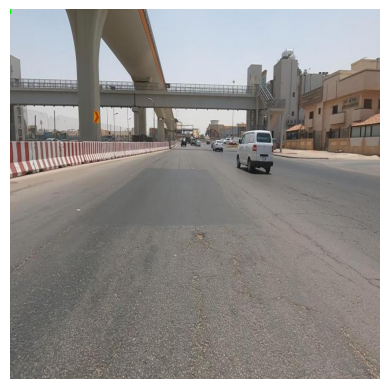

In [30]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path ='/content/Capstone-8/test/3518d589fbf05f96e35a59630f5eb594_jpg.rf.b89b80c3ac3a2ce42c4d7f3877622f94.jpg'
#image_path = '/content/Capstone-8/test/04c74fb6ff31ac072c204d468ae5b7de_jpg.rf.b6bb903aa921d203fa2bf713b24c6c8c.jpg'
label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Load the pre-trained VGG16 model
#model = VGG16(weights='imagenet')
# Make predictions on the image using the trained model
predictions = model.predict(img)
# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]
bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 21ms/step


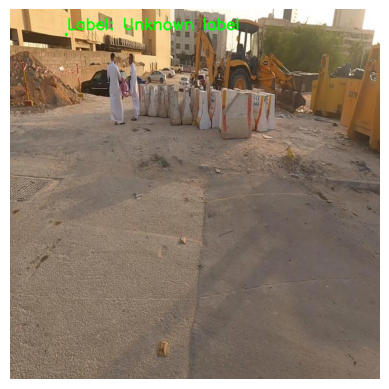

In [31]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path ='/content/Capstone-8/test/3887cf8d39e67c94041c9969d8dd5477_jpg.rf.2d627862ebc40b9b423da651bcfef1f6.jpg'
#image_path = '/content/Capstone-8/test/04c74fb6ff31ac072c204d468ae5b7de_jpg.rf.b6bb903aa921d203fa2bf713b24c6c8c.jpg'
label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Load the pre-trained VGG16 model
#model = VGG16(weights='imagenet')
# Make predictions on the image using the trained model
predictions = model.predict(img)
# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]
bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 20ms/step


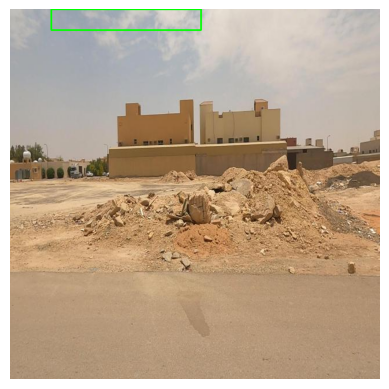

In [32]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image file
image_path ='/content/Capstone-8/test/59c381218eee247398087a0d8a5052cd_jpg.rf.380437fca6e565a662bd072e0359ec6d.jpg'
#image_path = '/content/Capstone-8/test/04c74fb6ff31ac072c204d468ae5b7de_jpg.rf.b6bb903aa921d203fa2bf713b24c6c8c.jpg'
label_mapping_tests = {
    0: 'garbage',
    1: 'construction_waste',
    2: 'graffiti',
    3: 'sand_on_road',
    4: 'construction_road',
    5: 'potholes',
    6: 'bad_billboard',
    7: 'clutter_sidewalk',
    8: 'broken_signage',
}
# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)

# Reshape the image to match the model's input shape
img = np.expand_dims(img, axis=0)

# Load the pre-trained VGG16 model
#model = VGG16(weights='imagenet')
# Make predictions on the image using the trained model
predictions = model.predict(img)
# Get the predicted label and bounding box coordinates
predicted_label = np.argmax(predictions, axis=1)[0]
bounding_box = predictions[0, 1:]  # Assuming the 0th index corresponds to the background class

# Create a dictionary to map integer labels back to their respective string labels
label_mapping_inverse = {index: label for label, index in label_mapping_tests.items()}

# Read the image
img = cv2.imread(image_path)

# Get the image dimensions
height, width, _ = img.shape

# Extract the bounding box coordinates
xmin = int(bounding_box[0] * width)
ymin = int(bounding_box[1] * height)
xmax = int(bounding_box[2] * width)
ymax = int(bounding_box[3] * height)

# Draw the bounding box on the image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Get the predicted label
predicted_label = label_mapping_inverse.get(predicted_label, "Unknown label")

# Add the predicted label text to the image
label_text = f"Label: {predicted_label}"
cv2.putText(img, label_text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding box and predicted label using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()